In [3]:
import pandas as pd 
import numpy as np 
import time 
import tensorflow as tf
import keras
import gc 

In [4]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import seaborn as sns
import pandas as pd
import numpy as np
import re

### Text input

In [5]:
reviews = pd.read_csv("merge1.0.csv")

In [6]:
reviews.head()

,TEXT,n,ANYIMAGE,VDAYR,AGE,RESIDNCE,SEX,ETHIM,RACEUN,ARREMS,...,SEEN72,INJPOISAD,CANCER,CEBVD,COPD,CHF,EDHIV,YEAR,VSEASON,ARRTIME2
0,Throat soreness,1,0,1,13,1,1,1,1,0,...,2,4,0,0,0,0,0,2012,1,1
1,"Side pain, flank pain Animal, human bite Viole...",2,1,3,16,1,0,2,1,0,...,2,1,0,0,0,0,0,2012,1,2
2,Depression,3,0,4,18,1,0,2,1,0,...,2,4,0,0,0,0,0,2012,1,2
3,Fever Cough,4,1,2,9,1,1,1,1,0,...,2,4,0,0,0,0,0,2012,1,3
4,"Contusions/abrasions/bruises of head,... Oth...",5,1,2,0,1,1,2,1,0,...,2,1,0,0,0,0,0,2012,1,3


In [7]:
reviews.isnull().values.any()

print(reviews.shape)

reviews.head()

(27665, 27)


,TEXT,n,ANYIMAGE,VDAYR,AGE,RESIDNCE,SEX,ETHIM,RACEUN,ARREMS,...,SEEN72,INJPOISAD,CANCER,CEBVD,COPD,CHF,EDHIV,YEAR,VSEASON,ARRTIME2
0,Throat soreness,1,0,1,13,1,1,1,1,0,...,2,4,0,0,0,0,0,2012,1,1
1,"Side pain, flank pain Animal, human bite Viole...",2,1,3,16,1,0,2,1,0,...,2,1,0,0,0,0,0,2012,1,2
2,Depression,3,0,4,18,1,0,2,1,0,...,2,4,0,0,0,0,0,2012,1,2
3,Fever Cough,4,1,2,9,1,1,1,1,0,...,2,4,0,0,0,0,0,2012,1,3
4,"Contusions/abrasions/bruises of head,... Oth...",5,1,2,0,1,1,2,1,0,...,2,1,0,0,0,0,0,2012,1,3


<AxesSubplot:xlabel='ANYIMAGE', ylabel='count'>

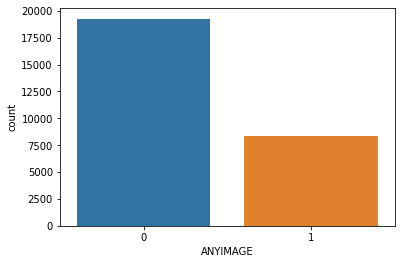

In [8]:


sns.countplot(x='ANYIMAGE', data=reviews)

In [9]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [10]:
X = []
sentences = list(reviews["TEXT"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = reviews['ANYIMAGE']

In [11]:
X

['Throat soreness ',
 'Side pain flank pain Animal human bite Violence Unarmed fight or brawl Assault by human bite ',
 'Depression ',
 'Fever Cough ',
 'Contusions abrasions bruises of head Other fall from one level to another Place of occurrence public building ',
 'Abnormal color of eyes ',
 'Knee pain ache soreness discomfort ',
 'Injury other and unspecified of ankle Injury other and unspecified of foo Unspec persn in nontrffc acc involv ',
 'Eczema and dermatitis ',
 'Insect bite ',
 'Injury other and unspecified of arm Accident Fall from nonmotorized scooter ',
 'Tonsillitis ',
 'Swelling of ankle Skin itching Bite of nonvenomous arthropod ',
 'Other diseases of the skin ',
 'Laceration cut of facial area Unspecified fall Accident caused by unspec cutting pie Place of occurrence public building',
 'Symptoms referable to hair and scalp Fall from chair ',
 'Head cold upper respiratory infectio Plugged feeling in ear ',
 'Spotting bleeding during pregnancy ',
 'Other diseases of th

In [12]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as glove_file:
    embeddings_dictionary = dict()

    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

glove_file.close()

In [18]:
X

['Throat soreness ',
 'Side pain flank pain Animal human bite Violence Unarmed fight or brawl Assault by human bite ',
 'Depression ',
 'Fever Cough ',
 'Contusions abrasions bruises of head Other fall from one level to another Place of occurrence public building ',
 'Abnormal color of eyes ',
 'Knee pain ache soreness discomfort ',
 'Injury other and unspecified of ankle Injury other and unspecified of foo Unspec persn in nontrffc acc involv ',
 'Eczema and dermatitis ',
 'Insect bite ',
 'Injury other and unspecified of arm Accident Fall from nonmotorized scooter ',
 'Tonsillitis ',
 'Swelling of ankle Skin itching Bite of nonvenomous arthropod ',
 'Other diseases of the skin ',
 'Laceration cut of facial area Unspecified fall Accident caused by unspec cutting pie Place of occurrence public building',
 'Symptoms referable to hair and scalp Fall from chair ',
 'Head cold upper respiratory infectio Plugged feeling in ear ',
 'Spotting bleeding during pregnancy ',
 'Other diseases of th

In [19]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [20]:
metrics = [
     keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [21]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(2, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [22]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            66650     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 158,556
Trainable params: 91,906
Non-trainable params: 66,650
_________________________________________________________________
None


In [23]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
277/277 [==============================] - 36s 128ms/step - loss: 0.5312 - tp: 13141.0000 - fp: 4564.0000 - tn: 13141.0000 - fn: 4564.0000 - accuracy: 0.7422 - precision: 0.7422 - recall: 0.7422 - auc: 0.8113 - val_loss: 0.5180 - val_tp: 3376.0000 - val_fp: 1051.0000 - val_tn: 3376.0000 - val_fn: 1051.0000 - val_accuracy: 0.7626 - val_precision: 0.7626 - val_recall: 0.7626 - val_auc: 0.8303
Epoch 2/10
277/277 [==============================] - 33s 118ms/step - loss: 0.4920 - tp: 13615.0000 - fp: 4090.0000 - tn: 13615.0000 - fn: 4090.0000 - accuracy: 0.7690 - precision: 0.7690 - recall: 0.7690 - auc: 0.8425 - val_loss: 0.5268 - val_tp: 3377.0000 - val_fp: 1050.0000 - val_tn: 3377.0000 - val_fn: 1050.0000 - val_accuracy: 0.7628 - val_precision: 0.7628 - val_recall: 0.7628 - val_auc: 0.8363
Epoch 3/10
277/277 [==============================] - 32s 117ms/step - loss: 0.4780 - tp: 13715.0000 - fp: 3990.0000 - tn: 13715.0000 - fn: 3990.0000 - accuracy: 0.7746 - precision: 0.7746 -

In [24]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Loss:", score[0])
print("Test Accuracy:", score[5])
print("Test Precision:", score[6])
print("Test Recall:", score[7])

173/173 [==============================] - 6s 32ms/step - loss: 0.4760 - tp: 4328.0000 - fp: 1205.0000 - tn: 4328.0000 - fn: 1205.0000 - accuracy: 0.7822 - precision: 0.7822 - recall: 0.7822 - auc: 0.86122s - loss: 0.4886 - tp: 2555.0000 - fp: 741.0000 - tn: 2555.0000 - fn: 741.0000 - accuracy: 0.7752 - precision: 0.7752 - recall: 0 - ETA: 0s - loss: 0.4771 - tp: 4126.0000 - fp: 1154.0000 - tn: 4126.0000 - fn: 1154.0000 - accuracy: 0.7814 - precision: 0.7814 - recall: 0.7814 - auc: 0.8
Test Loss: 0.47596874833106995
Test Accuracy: 0.7822157740592957
Test Precision: 0.7822157740592957
Test Recall: 0.7822157740592957


In [56]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
    metrics =  ['auc', 'accuracy', 'precision', 'recall']
    fig = plt.figure(figsize=(18, 10.5))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        
        plt.subplot(2,2,n+1)
        
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'auc':
            plt.ylim([0.7, 0.9])
        elif metric == 'accuracy':
            plt.ylim([0.7,0.8])
        else:
            plt.ylim([0.7,0.8])

    plt.legend()
   
    return(fig)

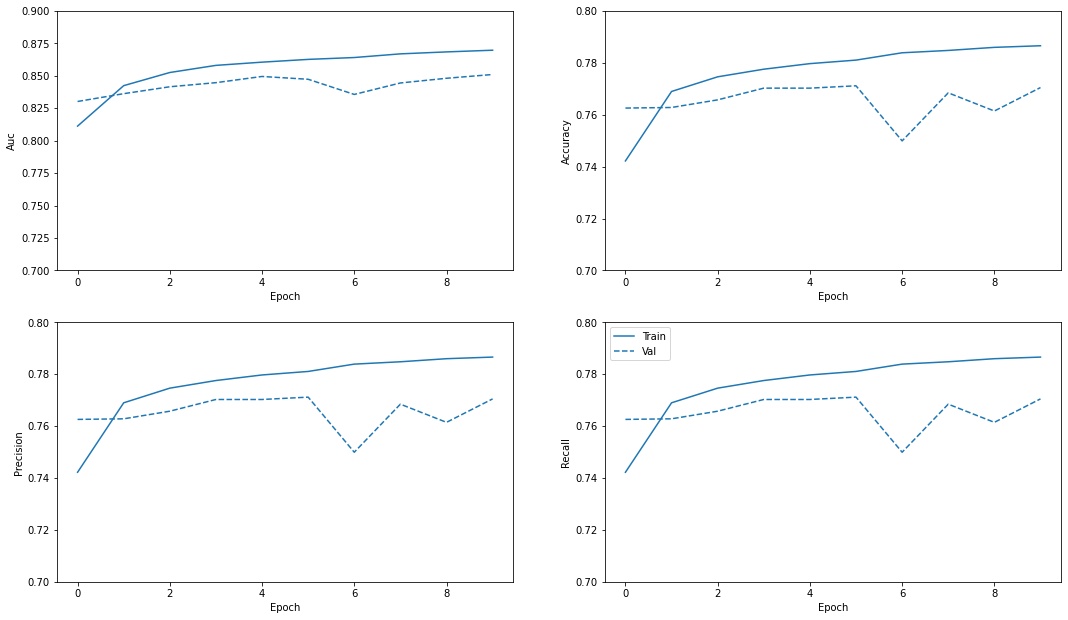

In [57]:
fig=plot_metrics(history)

In [59]:
fig.savefig("model1_metrics.jpeg")

In [60]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [62]:
from sklearn.metrics import confusion_matrix
test_pred = np.where(test_predictions[:,0]>0.5, 0, 1)
train_pred = np.where(train_predictions[:,0]>0.5, 0, 1)
target_test=y_test[:,1]
target_train=y_train[:,1]
cm = confusion_matrix(target_test, test_pred)
#print(cm)
#type(test_predictions>0.5)

from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
    fig = plt.figure(figsize=(18, 10.5))
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.legend(loc='lower right')
    return(fig)



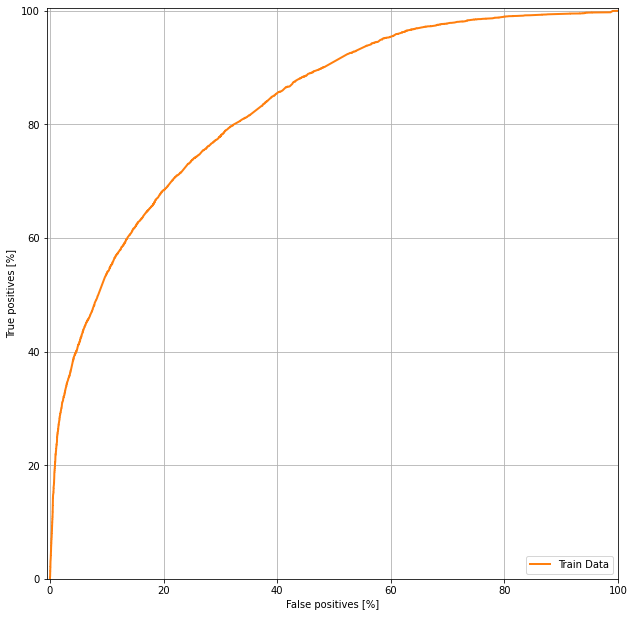

In [67]:
fig=plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
#plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model1_train_roc.jpeg")

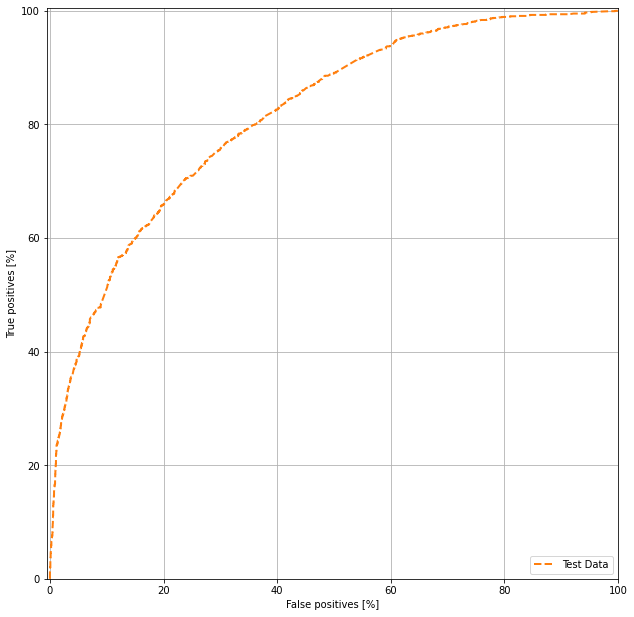

In [68]:
#plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
fig=plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model1_test_roc.jpeg")

### Structured input

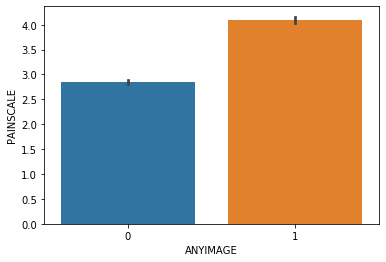

In [26]:
#sns.barplot(x='ANYIMAGE', y='PAINSCALE', data=reviews)

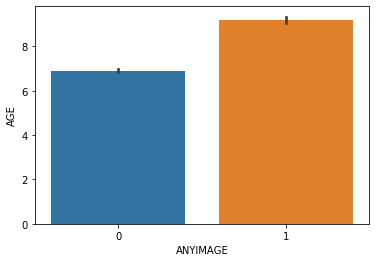

In [30]:
#sns.barplot(x='ANYIMAGE', y='AGE', data=reviews)

In [69]:
reviews_meta = pd.read_csv("reviews_meta_dummy.csv")

#reviews_meta = reviews_meta.values

In [70]:
reviews_meta=reviews_meta.iloc[:,3:]

In [71]:
reviews_meta.head()

,AGE,SEX,ARREMS,TEMPF,PULSE,BPSYS,BPDIAS,POPCT,PAINSCALE,CANCER,...,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,VSEASON_1,VSEASON_2,VSEASON_3,ARRTIME2_1,ARRTIME2_2,ARRTIME2_3
0,13,1,0,38,112,130,72,99,7,0,...,0,0,0,0,1,0,0,1,0,0
1,16,0,0,36,95,136,71,99,10,0,...,0,0,0,0,1,0,0,0,1,0
2,18,0,0,36,111,143,88,98,3,0,...,0,0,0,0,1,0,0,0,1,0
3,9,1,0,39,134,115,69,97,3,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,36,128,115,69,100,3,0,...,0,0,0,0,1,0,0,0,0,1


In [72]:
X_train, X_test, y_train, y_test = train_test_split(reviews_meta, y, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [73]:
input2 = Input(shape=(46,))
dense_layer_1 = Dense(64, activation='relu')(input2)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
output = Dense(2, activation='softmax')(dense_layer_2)

model = Model(inputs=input2, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [74]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3008      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 7,298
Trainable params: 7,298
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
554/554 [==============================] - 4s 7ms/step - loss: 0.6830 - tp: 16274.0000 - fp: 6964.0000 - tn: 16274.0000 - fn: 6964.0000 - accuracy: 0.7003 - precision: 0.7003 - recall: 0.7003 - auc: 0.7600 - val_loss: 0.5800 - val_tp: 3136.0000 - val_fp: 1291.0000 - val_tn: 3136.0000 - val_fn: 1291.0000 - val_accuracy: 0.7084 - val_precision: 0.7084 - val_recall: 0.7084 - val_auc: 0.7693
Epoch 2/10
554/554 [==============================] - 2s 4ms/step - loss: 0.6116 - tp: 12367.0000 - fp: 5338.0000 - tn: 12367.0000 - fn: 5338.0000 - accuracy: 0.6985 - precision: 0.6985 - recall: 0.6985 - auc: 0.7508 - val_loss: 0.5746 - val_tp: 3141.0000 - val_fp: 1286.0000 - val_tn: 3141.0000 - val_fn: 1286.0000 - val_accuracy: 0.7095 - val_precision: 0.7095 - val_recall: 0.7095 - val_auc: 0.7741
Epoch 3/10
554/554 [==============================] - 3s 6ms/step - loss: 0.6033 - tp: 12420.0000 - fp: 5285.0000 - tn: 12420.0000 - fn: 5285.0000 - accuracy: 0.7015 - precision: 0.7015 - recall: 

In [76]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Loss:", score[0])
print("Test Accuracy:", score[5])
print("Test Precision:", score[6])
print("Test Recall:", score[7])

173/173 [==============================] - 0s 3ms/step - loss: 0.5634 - tp: 4002.0000 - fp: 1531.0000 - tn: 4002.0000 - fn: 1531.0000 - accuracy: 0.7233 - precision: 0.7233 - recall: 0.7233 - auc: 0.7854
Test Loss: 0.5634382367134094
Test Accuracy: 0.723296582698822
Test Precision: 0.723296582698822
Test Recall: 0.723296582698822


In [77]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
    metrics =  ['auc', 'accuracy', 'precision', 'recall']
    fig = plt.figure(figsize=(18, 10.5))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        
        plt.subplot(2,2,n+1)
        
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'auc':
            plt.ylim([0.7, 0.8])
        elif metric == 'accuracy':
            plt.ylim([0.65,0.75])
        else:
            plt.ylim([0.65,0.75])

    plt.legend()
   
    return(fig)


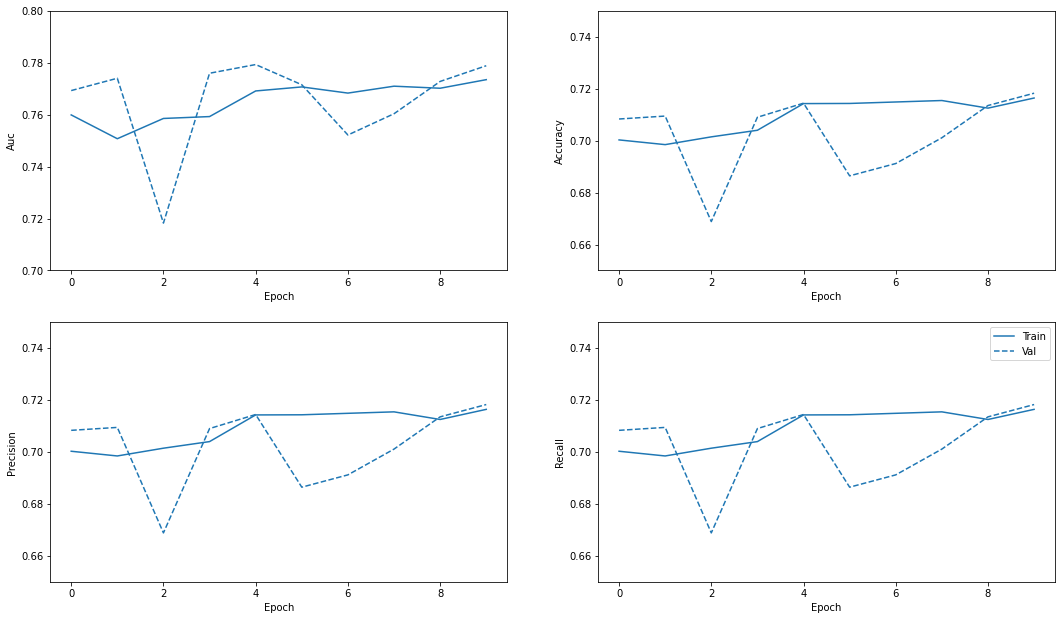

In [78]:
fig=plot_metrics(history)

In [79]:
fig.savefig("model2_metrics.jpeg")

In [80]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [81]:
from sklearn.metrics import confusion_matrix
test_pred = np.where(test_predictions[:,0]>0.5, 0, 1)
train_pred = np.where(train_predictions[:,0]>0.5, 0, 1)
target_test=y_test[:,1]
target_train=y_train[:,1]
cm = confusion_matrix(target_test, test_pred)
#print(cm)
#type(test_predictions>0.5)

from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
    fig = plt.figure(figsize=(18, 10.5))
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.legend(loc='lower right')
    return(fig)


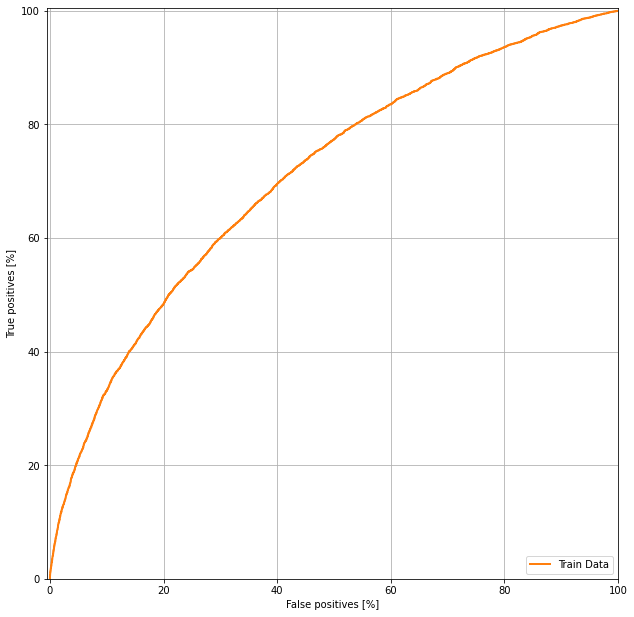

In [82]:
fig=plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
#plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model2_train_roc.jpeg")

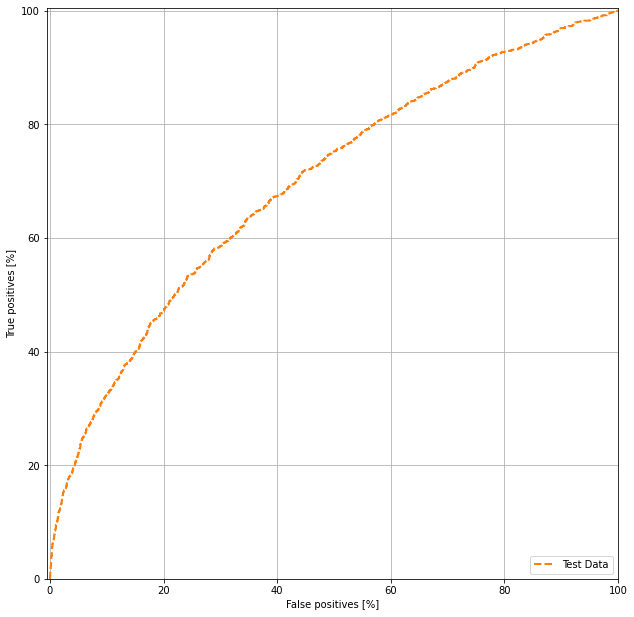

In [83]:
#plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
fig=plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model2_test_roc.jpeg")

### Mixed input

In [84]:
reviews=pd.read_csv("merge2.0.csv")
X = reviews.drop('ANYIMAGE', axis=1)
y =reviews['ANYIMAGE']

In [85]:
X.head()

,AGE,SEX,ARREMS,TEMPF,PULSE,BPSYS,BPDIAS,POPCT,PAINSCALE,CANCER,...,YEAR_2014,YEAR_2015,YEAR_2016,VSEASON_1,VSEASON_2,VSEASON_3,ARRTIME2_1,ARRTIME2_2,ARRTIME2_3,TEXT
0,13,1,0,38,112,130,72,99,7,0,...,0,0,0,1,0,0,1,0,0,Throat soreness
1,16,0,0,36,95,136,71,99,10,0,...,0,0,0,1,0,0,0,1,0,"Side pain, flank pain Animal, human bite Viole..."
2,18,0,0,36,111,143,88,98,3,0,...,0,0,0,1,0,0,0,1,0,Depression
3,9,1,0,39,134,115,69,97,3,0,...,0,0,0,1,0,0,0,0,1,Fever Cough
4,0,1,0,36,128,115,69,100,3,0,...,0,0,0,1,0,0,0,0,1,"Contusions/abrasions/bruises of head,... Oth..."


In [86]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [87]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [88]:
X1_train = []
sentences = list(X_train["TEXT"])
for sen in sentences:
    X1_train.append(preprocess_text(sen))

In [89]:
X1_test = []
sentences = list(X_test["TEXT"])
for sen in sentences:
    X1_test.append(preprocess_text(sen))

In [90]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [91]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [92]:
X2_train = X_train.drop('TEXT', axis=1).values
X2_test = X_test.drop('TEXT', axis=1).values

In [101]:
input_1 = Input(shape=(maxlen,))

input_2 = Input(shape=(46,))

In [102]:
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

In [103]:
dense_layer_1 = Dense(64, activation='relu')(input_2)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)

In [104]:
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(64, activation='relu')(concat_layer)
output = Dense(2, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 46)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 50)       66650       input_5[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 64)           3008        input_6[0][0]                    
____________________________________________________________________________________________

In [106]:
history = model.fit(x=[X1_train, X2_train], y=y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
139/139 [==============================] - 23s 165ms/step - loss: 0.8360 - tp: 16632.0000 - fp: 6606.0000 - tn: 16632.0000 - fn: 6606.0000 - accuracy: 0.7157 - precision: 0.7157 - recall: 0.7157 - auc: 0.7635 - val_loss: 0.5155 - val_tp: 3330.0000 - val_fp: 1097.0000 - val_tn: 3330.0000 - val_fn: 1097.0000 - val_accuracy: 0.7522 - val_precision: 0.7522 - val_recall: 0.7522 - val_auc: 0.8273
Epoch 2/10
139/139 [==============================] - 23s 165ms/step - loss: 0.5134 - tp: 13295.0000 - fp: 4410.0000 - tn: 13295.0000 - fn: 4410.0000 - accuracy: 0.7509 - precision: 0.7509 - recall: 0.7509 - auc: 0.8269 - val_loss: 0.4989 - val_tp: 3357.0000 - val_fp: 1070.0000 - val_tn: 3357.0000 - val_fn: 1070.0000 - val_accuracy: 0.7583 - val_precision: 0.7583 - val_recall: 0.7583 - val_auc: 0.8382
Epoch 3/10
139/139 [==============================] - 29s 211ms/step - loss: 0.4841 - tp: 13598.0000 - fp: 4107.0000 - tn: 13598.0000 - fn: 4107.0000 - accuracy: 0.7680 - precision: 0.7680 -

In [107]:
score = model.evaluate(x=[X1_test, X2_test], y=y_test, verbose=1)

print("Test Loss:", score[0])
print("Test Accuracy:", score[5])
print("Test Precision:", score[6])
print("Test Recall:", score[7])

173/173 [==============================] - 5s 28ms/step - loss: 0.4593 - tp: 4339.0000 - fp: 1194.0000 - tn: 4339.0000 - fn: 1194.0000 - accuracy: 0.7842 - precision: 0.7842 - recall: 0.7842 - auc: 0.8652 loss: 0.4572 - tp: 223.0000 - fp: 65.0000 - tn: 223.0000 -
Test Loss: 0.4593117833137512
Test Accuracy: 0.7842038869857788
Test Precision: 0.7842038869857788
Test Recall: 0.7842038869857788


In [110]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
    metrics =  ['auc', 'accuracy', 'precision', 'recall']
    fig = plt.figure(figsize=(18, 10.5))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        
        plt.subplot(2,2,n+1)
        
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'auc':
            plt.ylim([0.7, 0.9])
        elif metric == 'accuracy':
            plt.ylim([0.7,0.8])
        else:
            plt.ylim([0.7,0.8])

    plt.legend()
   
    return(fig)

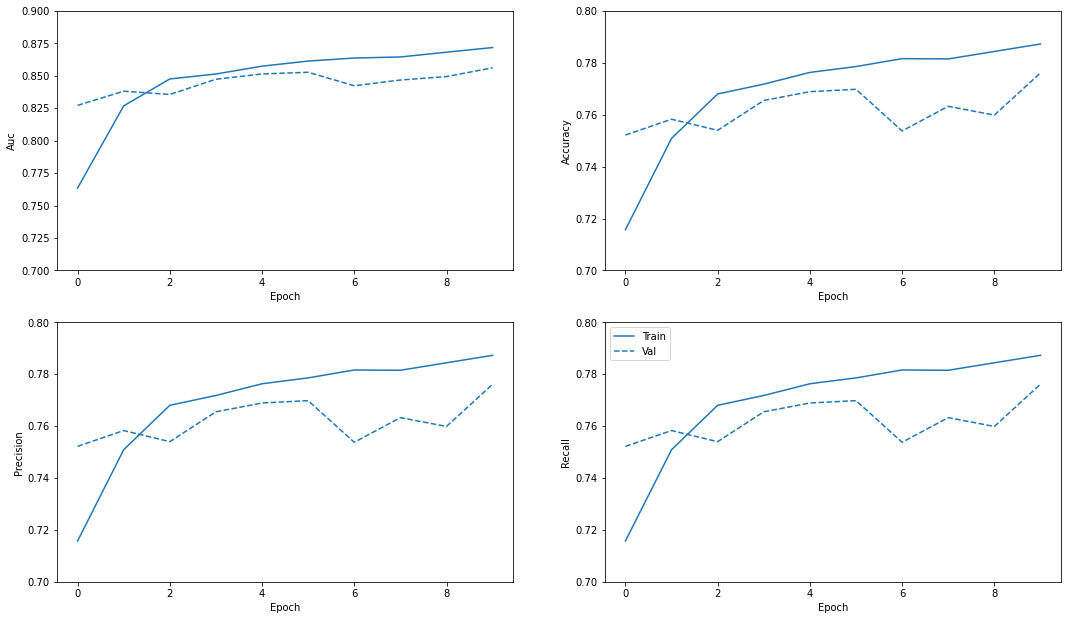

In [111]:
fig=plot_metrics(history)

In [113]:
fig.savefig("model3_metrics.jpeg")

In [114]:
test_predictions = model.predict([X1_test, X2_test])
train_predictions = model.predict([X1_train, X2_train])

In [115]:
from sklearn.metrics import confusion_matrix
test_pred = np.where(test_predictions[:,0]>0.5, 0, 1)
train_pred = np.where(train_predictions[:,0]>0.5, 0, 1)
target_test=y_test[:,1]
target_train=y_train[:,1]
cm = confusion_matrix(target_test, test_pred)
#print(cm)
#type(test_predictions>0.5)

from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
    fig = plt.figure(figsize=(18, 10.5))
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.legend(loc='lower right')
    return(fig)


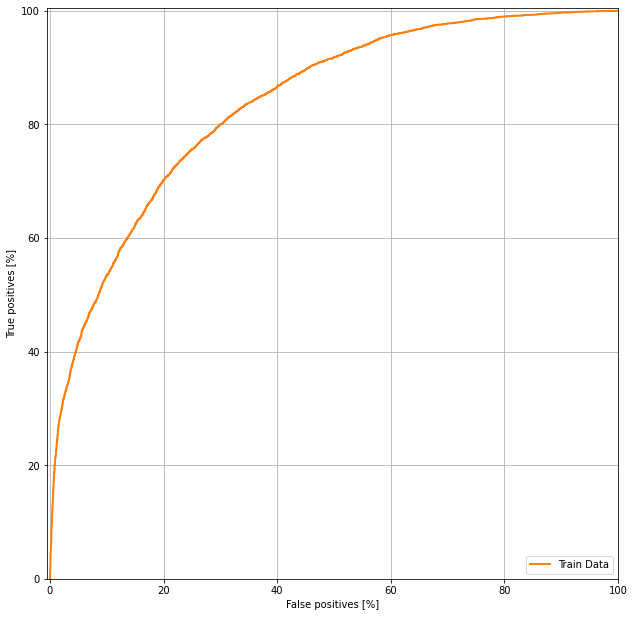

In [116]:
fig=plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
#plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model3_train_roc.jpeg")

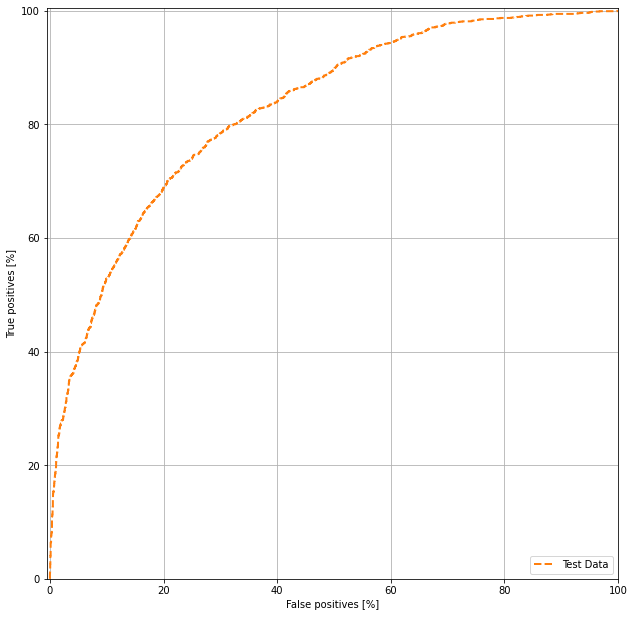

In [117]:
#plot_roc("Train Data", target_train, train_predictions[:,1], color=colors[1])
fig=plot_roc("Test Data", target_test, test_predictions[:,1], color=colors[1], linestyle='--')

fig.savefig("model3_test_roc.jpeg")